In [4]:
import scipy.io
from matplotlib import pyplot as plt

mat = scipy.io.loadmat('binaryalphadigs.mat')

In [9]:
mat['dat'].shape

(36, 39)

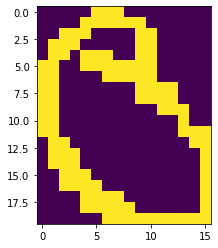

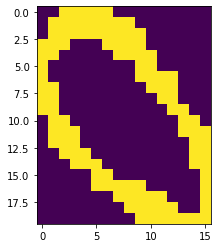

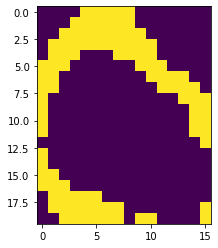

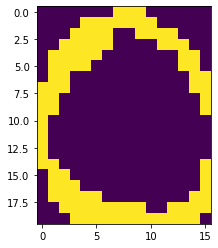

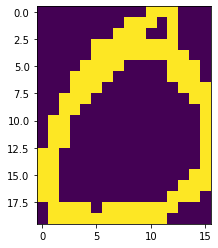

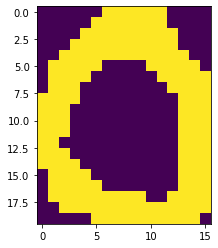

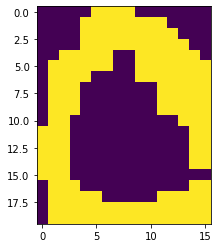

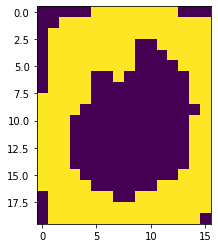

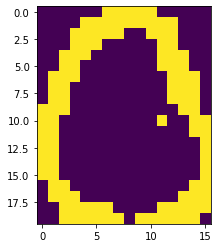

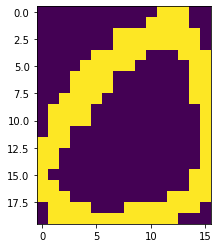

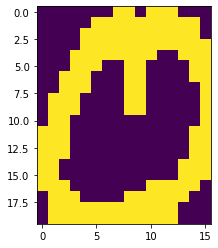

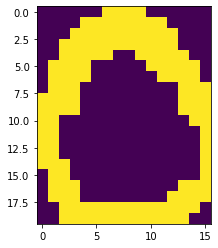

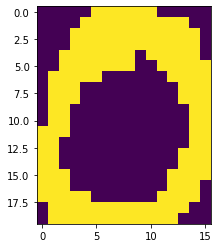

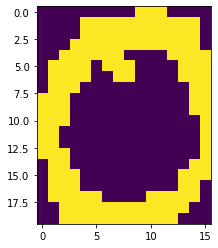

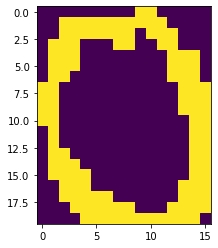

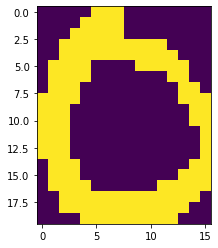

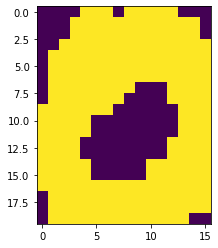

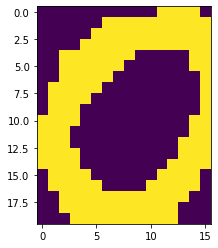

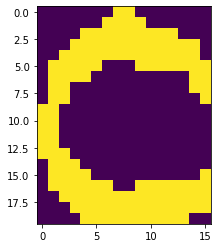

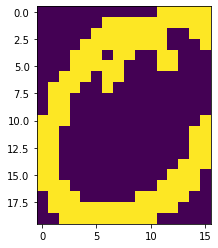

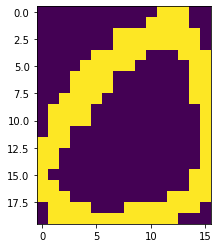

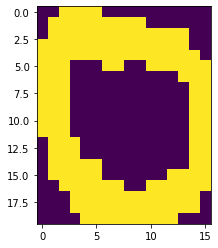

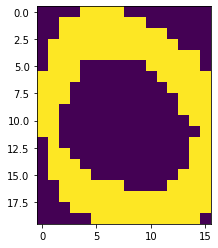

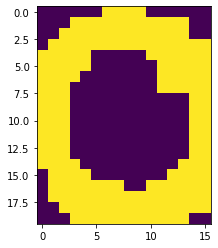

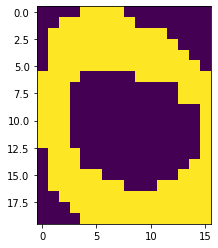

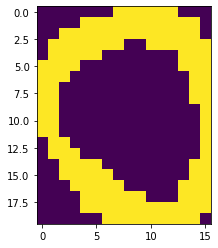

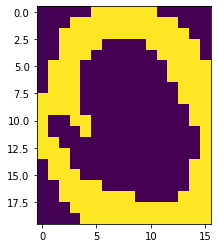

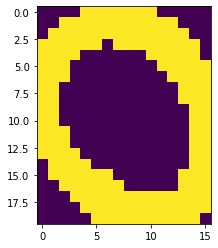

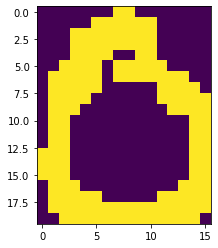

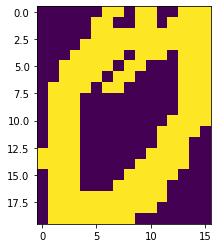

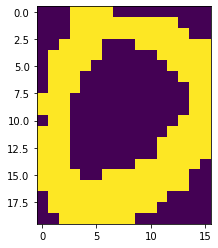

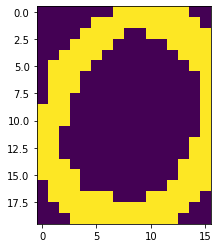

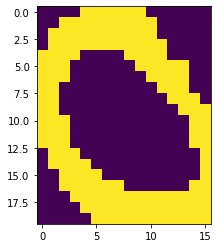

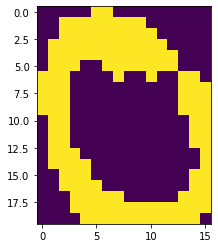

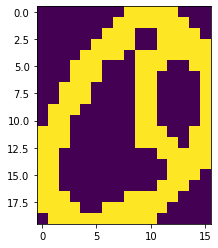

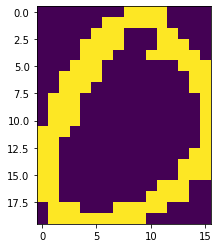

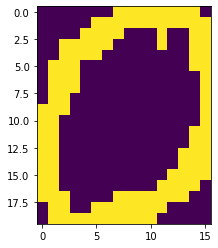

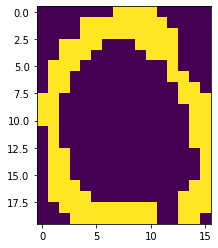

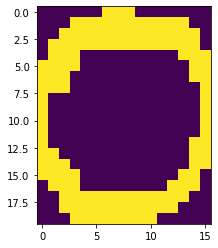

In [10]:
for image in mat['dat'][0]:
    plt.imshow(image)
    plt.show()